# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [220]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [222]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head(3)

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [223]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [226]:
# Vamos ver qual é o min e max usando 'desbribe'
sinasc_raw.munResLat.describe()

count    27027.000000
mean       -10.377988
std          1.372942
min        -13.499760
25%        -11.433870
50%        -10.435950
75%         -8.768890
max         -8.768890
Name: munResLat, dtype: float64

In [227]:
# De acordo com o mínimo e o máximo, podemos criar as faixas: {de -13.5 a -10.5}  e {de -10.5 a -9.0}
lat_mun = pd.cut(sinasc_raw['munResLat'], [-13.5, -10.5, -9])
lat_mun.value_counts(dropna=False)

munResLat
(-13.5, -10.5]    12993
NaN                8775
(-10.5, -9.0]      5260
Name: count, dtype: int64

In [228]:
sinasc_raw.groupby(lat_mun)[['APGAR5', 'QTDFILMORT']].agg([
    ('Soma', 'sum'),
    ('Média', 'mean'),
    ('Mín', 'min'),
    ('Máx', 'max'),
    ('Mediana', 'median'),
    ('Desvio padrão', 'std'), 
    ('Variância', 'var')])


C:\Users\mtidi\AppData\Local\Temp\ipykernel_15020\4248622522.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sinasc_raw.groupby(lat_mun)[['APGAR5', 'QTDFILMORT']].agg([


APGAR5                                                       \
                    Soma     Média  Mín   Máx Mediana Desvio padrão Variância   
munResLat                                                                       
(-13.5, -10.5]  118393.0  9.138788  0.0  10.0     9.0      0.805381  0.648638   
(-10.5, -9.0]    48425.0  9.220297  0.0  10.0     9.0      0.797076  0.635330   

               QTDFILMORT                                                       
                     Soma     Média  Mín   Máx Mediana Desvio padrão Variância  
munResLat                                                                       
(-13.5, -10.5]     3105.0  0.242521  0.0  28.0     0.0      0.599430  0.359317  
(-10.5, -9.0]      1256.0  0.264199  0.0   9.0     0.0      0.603686  0.364436

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [230]:
# Vamos ver qual é o min e max usando 'desbribe'
sinasc_raw.munResArea.describe()

count    27027.000000
mean     14702.799767
std      13706.177751
min        459.978000
25%       3792.998000
50%       6896.648000
75%      34096.394000
max      34096.394000
Name: munResArea, dtype: float64

In [231]:
# De acordo com o mínimo e o máximo, podemos criar as faixas: {abaixo de 3000}  e {acima de 3000}
area_mun = pd.cut(sinasc_raw['munResArea'], [450, 3000, 34100])
area_mun.value_counts(dropna=False)

munResArea
(3000.0, 34100.0]    21808
(450.0, 3000.0]       5219
NaN                      1
Name: count, dtype: int64

In [232]:
sinasc_raw.groupby(area_mun)[['APGAR5', 'QTDFILMORT']].agg([
    ('Soma', 'sum'),
    ('Média', 'mean'),
    ('Mín', 'min'),
    ('Máx', 'max'),
    ('Mediana', 'median'),
    ('Desvio padrão', 'std'),
    ('Variância', 'var')
])


C:\Users\mtidi\AppData\Local\Temp\ipykernel_15020\1198998166.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sinasc_raw.groupby(area_mun)[['APGAR5', 'QTDFILMORT']].agg([


APGAR5                                                       \
                   Soma     Média  Mín   Máx Mediana Desvio padrão Variância   
munResArea                                                                     
(450, 3000]     47560.0  9.130351  0.0  10.0     9.0      0.801124  0.641799   
(3000, 34100]  199579.0  9.190836  0.0  10.0     9.0      0.787591  0.620299   

              QTDFILMORT                                                       
                    Soma     Média  Mín   Máx Mediana Desvio padrão Variância  
munResArea                                                                     
(450, 3000]       1260.0  0.244803  0.0   4.0     0.0      0.551215  0.303838  
(3000, 34100]     5383.0  0.272116  0.0  28.0     0.0      0.629081  0.395743

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [234]:
alt_mun = pd.cut(sinasc_raw['munResAlt'], bins=4)
alt_mun.value_counts(dropna=False)

munResAlt
(84.49, 212.5]    21269
(212.5, 340.0]     3800
(467.5, 595.0]     1590
(340.0, 467.5]      368
NaN                   1
Name: count, dtype: int64

In [235]:
sinasc_raw.groupby(alt_mun)[['APGAR5', 'QTDFILMORT']].agg(['sum','mean','min','max','median','std','var'])

C:\Users\mtidi\AppData\Local\Temp\ipykernel_15020\2782808610.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sinasc_raw.groupby(alt_mun)[['APGAR5', 'QTDFILMORT']].agg(['sum','mean','min','max','median','std','var'])


APGAR5                                                  \
                     sum      mean  min   max median       std       var   
munResAlt                                                                  
(84.49, 212.5]  194845.0  9.199046  0.0  10.0    9.0  0.784975  0.616186   
(212.5, 340.0]   34557.0  9.115537  0.0  10.0    9.0  0.877360  0.769761   
(340.0, 467.5]    3340.0  9.076087  1.0  10.0    9.0  0.700077  0.490108   
(467.5, 595.0]   14397.0  9.089015  1.0  10.0    9.0  0.635071  0.403316   

               QTDFILMORT                                                  
                      sum      mean  min   max median       std       var  
munResAlt                                                                  
(84.49, 212.5]     5277.0  0.274458  0.0   9.0    0.0  0.602997  0.363606  
(212.5, 340.0]      886.0  0.235826  0.0   4.0    0.0  0.538966  0.290484  
(340.0, 467.5]       82.0  0.225895  0.0   3.0    0.0  0.518915  0.269272  
(467.5, 595.0]      398.0  0.251580  0.0  28.0    0.0  0.874790  0.765257

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia


In [237]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}



In [238]:
sinasc_2 = sinasc_raw.set_index('munResNome')
sinasc_2.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,PARIDADE,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResUf,munResLat,munResLon,munResAlt,munResArea
munResNome,,,,,,,,,,,,,,,,,,,,,
Alta Floresta D'Oeste,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,0,5,1,ATIVO,MUNIC,Rondônia,-11.93554,-61.99982,338.0,7067.025
Alta Floresta D'Oeste,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,1,5,2,ATIVO,MUNIC,Rondônia,-11.93554,-61.99982,338.0,7067.025
Alta Floresta D'Oeste,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,1,5,3,ATIVO,MUNIC,Rondônia,-11.93554,-61.99982,338.0,7067.025
Alto Alegre dos Parecis,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,0,4,4,ATIVO,MUNIC,Rondônia,-12.13178,-61.85308,397.0,3958.273
Alta Floresta D'Oeste,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,1,5,5,ATIVO,MUNIC,Rondônia,-11.93554,-61.99982,338.0,7067.025


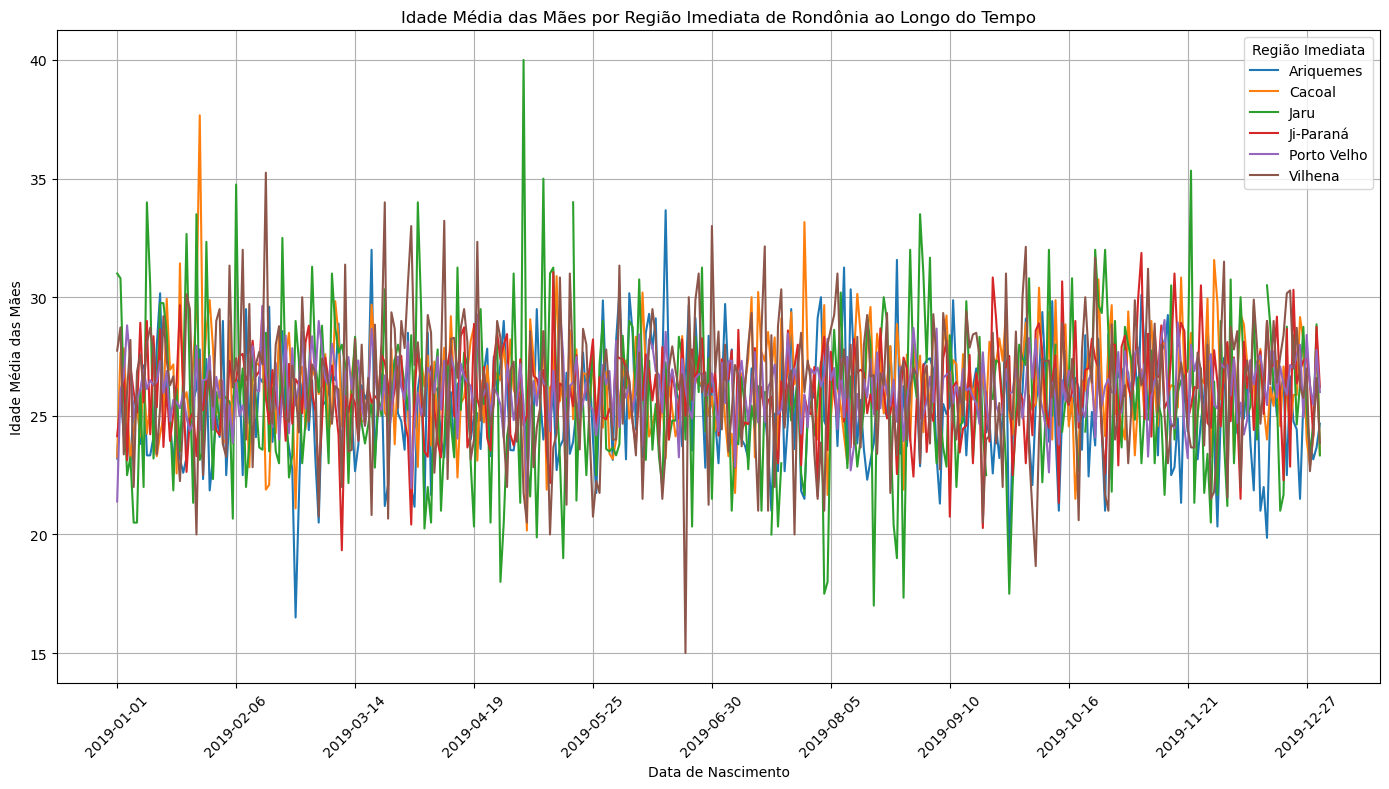

In [239]:
# O grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia

idade_media_por_regiao = sinasc_2.groupby(['DTNASC', imediatas])['IDADEMAE'].mean().unstack()

# Criação do gráfico de linhas
plt.figure(figsize=(14, 8))

# Plotar cada região imediata como uma linha
for regiao in idade_media_por_regiao.columns:
    plt.plot(idade_media_por_regiao.index, idade_media_por_regiao[regiao], label=regiao)

# Personalizar o gráfico
plt.title('Idade Média das Mães por Região Imediata de Rondônia ao Longo do Tempo')
plt.xlabel('Data de Nascimento')
plt.ylabel('Idade Média das Mães')
plt.legend(title='Região Imediata')
plt.grid(True)
plt.xticks(ticks=idade_media_por_regiao.index[::int(len(idade_media_por_regiao) / 10)], rotation=45)

# Mostrar o gráfico
plt.tight_layout()
plt.show()

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [242]:
idh_Ron = {
    "Porto Velho": "IDH-M alto",
    "Vilhena": "IDH-M alto",
    "Cacoal": "IDH-M alto",
    "Ji-Paraná": "IDH-M alto",
    "Pimenta Bueno": "IDH-M alto",
    "Ariquemes": "IDH-M alto",
    "Rolim de Moura": "IDH-M alto",
    
    "Cerejeiras": "IDH-M médio",
    "Jaru": "IDH-M médio",
    "Colorado do Oeste": "IDH-M médio",
    "Ouro Preto do Oeste": "IDH-M médio",
    "Espigão D'Oeste": "IDH-M médio",
    "Santa Luzia D'Oeste": "IDH-M médio",
    "Pimenteiras do Oeste": "IDH-M médio",
    "Presidente Médici": "IDH-M médio",
    "Castanheiras": "IDH-M médio",
    "Guajará-Mirim": "IDH-M médio",
    "Chupinguaia": "IDH-M médio",
    "Cabixi": "IDH-M médio",
    "Candeias do Jamari":  "IDH-M médio",
    "São Felipe D'Oeste": "IDH-M médio",
    "Cacaulândia": "IDH-M médio",
    "São Miguel do Guaporé": "IDH-M médio",
    "Mirante da Serra": "IDH-M médio",
    "Alvorada D'Oeste": "IDH-M médio",
    "Teixeirópolis": "IDH-M médio",
    "Nova Brasilândia D'Oeste": "IDH-M médio",
    "Rio Crespo": "IDH-M médio",
    "Primavera de Rondônia": "IDH-M médio",
    "Alta Floresta D'Oeste": "IDH-M médio",
    "Ministro Andreazza": "IDH-M médio",
    "Novo Horizonte do Oeste": "IDH-M médio",
    "Vale do Paraíso": "IDH-M médio",
    "Alto Paraíso": "IDH-M médio",
    "Parecis": "IDH-M médio",
    "Buritis": "IDH-M médio",
    "Itapuã do Oeste": "IDH-M médio",
    "Corumbiara": "IDH-M médio",
    "Cujubim": "IDH-M médio",
    "Costa Marques": "IDH-M médio",
    "São Francisco do Guaporé": "IDH-M médio",
    "Urupá": "IDH-M médio",
    "Monte Negro": "IDH-M médio",
    
    "Seringueiras": "IDH-M baixo",
    "Governador Jorge Teixeira": "IDH-M baixo",
    "Machadinho D'Oeste": "IDH-M baixo",
    "Campo Novo de Rondônia": "IDH-M baixo",
    "Alto Alegre dos Parecis": "IDH-M baixo",
    "Theobroma": "IDH-M baixo",
    "Nova União": "IDH-M baixo",
    "Nova Mamoré": "IDH-M baixo",
    "Vale do Anari": "IDH-M baixo"
}

In [243]:
sinasc_2.groupby(idh_Ron)[['IDADEMAE', 'APGAR5', 'CONSULTAS']].agg(['count', 'mean','median', 'min', 'max'])

IDADEMAE                           APGAR5                        \
               count       mean median min max  count      mean median  min   
munResNome                                                                    
IDH-M alto     16855  26.280332   26.0  12  47  16794  9.171668    9.0  0.0   
IDH-M baixo     1826  25.326944   25.0  13  46   1820  9.172527    9.0  1.0   
IDH-M médio     8346  25.884855   25.0  11  53   8310  9.195668    9.0  0.0   

                  CONSULTAS                           
              max     count      mean median min max  
munResNome                                            
IDH-M alto   10.0     16855  3.526372    4.0   1   9  
IDH-M baixo  10.0      1826  3.641292    4.0   1   9  
IDH-M médio  10.0      8346  3.663551    4.0   1   9

### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [245]:
# Dicionário para mapeamento dos municípios com base no nível de desenvolvimento
ifdm_Ron = {
    'Ariquemes': 'IFDM Moderado',
    'Vilhena': 'IFDM Moderado',
    'Pimenta Bueno': 'IFDM Moderado',
    'Porto Velho': 'IFDM Moderado',
    'Ji-Paraná': 'IFDM Moderado',
    'Cacoal': 'IFDM Moderado',
    'Santa Luzia d\'Oeste': 'IFDM Moderado',
    'Rolim de Moura': 'IFDM Moderado',
    'Chupinguaia': 'IFDM Moderado',
    'São Miguel do Guaporé': 'IFDM Moderado',
    'Pimenteiras do Oeste': 'IFDM Moderado',
    'Teixeirópolis': 'IFDM Moderado',
    'Colorado do Oeste': 'IFDM Moderado',
    'Jaru': 'IFDM Moderado',
    'Rio Crespo': 'IFDM Moderado',
    'Primavera de Rondônia': 'IFDM Moderado',
    'Alta Floresta d\'Oeste': 'IFDM Moderado',
    'Ouro Preto do Oeste': 'IFDM Moderado',
    'São Francisco do Guaporé': 'IFDM Moderado',
    'Candeias do Jamari': 'IFDM Moderado',
    'Buritis': 'IFDM Moderado',
    'São Felipe d\'Oeste': 'IFDM Moderado',
    'Presidente Médici': 'IFDM Moderado',
    'Cerejeiras': 'IFDM Moderado',
    'Monte Negro': 'IFDM Moderado',
    'Urupá': 'IFDM Moderado',
    'Espigão d\'Oeste': 'IFDM Regular',
    'Seringueiras': 'IFDM Regular',
    'Alvorada d\'Oeste': 'IFDM Regular',
    'Itapuã do Oeste': 'IFDM Regular',
    'Cabixi': 'IFDM Regular',
    'Novo Horizonte do Oeste': 'IFDM Regular',
    'Nova Brasilândia d\'Oeste': 'IFDM Regular',
    'Vale do Paraíso': 'IFDM Regular',
    'Corumbiara': 'IFDM Regular',
    'Alto Paraíso': 'IFDM Regular',
    'Cacaulândia': 'IFDM Regular',
    'Vale do Anari': 'IFDM Regular',
    'Ministro Andreazza': 'IFDM Regular',
    'Costa Marques': 'IFDM Regular',
    'Nova União': 'IFDM Regular',
    'Guajará-Mirim': 'IFDM Regular',
    'Mirante da Serra': 'IFDM Regular',
    'Parecis': 'IFDM Regular',
    'Castanheiras': 'IFDM Regular',
    'Theobroma': 'IFDM Regular',
    'Machadinho d\'Oeste': 'IFDM Regular',
    'Campo Novo de Rondônia': 'IFDM Regular',
    'Nova Mamoré': 'IFDM Regular',
    'Cujubim': 'IFDM Regular',
    'Alto Alegre dos Parecis': 'IFDM Regular',
    'Governador Jorge Teixeira': 'IFDM Regular'

}


In [246]:
sinasc_2.groupby(ifdm_Ron)[['IDADEMAE', 'APGAR5', 'CONSULTAS']].agg(['count', 'mean','median', 'min', 'max'])

IDADEMAE                           APGAR5                        \
                 count       mean median min max  count      mean median  min   
munResNome                                                                      
IFDM Moderado    21426  26.226921   26.0  12  53  21347  9.184522    9.0  0.0   
IFDM Regular      3665  25.412005   25.0  11  52   3648  9.233004    9.0  0.0   

                    CONSULTAS                           
                max     count      mean median min max  
munResNome                                              
IFDM Moderado  10.0     21426  3.572389    4.0   1   9  
IFDM Regular   10.0      3665  3.554980    4.0   1   9

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [248]:
pid_Ron = {
    "Porto Velho" : 'Acima de 1 bilhão',
    "Ji-Paraná": 'Acima de 1 bilhão',
    "Vilhena": 'Acima de 1 bilhão',
    "Ariquemes": 'Acima de 1 bilhão',
    "Cacoal": 'Acima de 1 bilhão',
    "Jaru": 'Acima de 1 bilhão',
    "Rolim de Moura": 'Acima de 1 bilhão',
    "Pimenta Bueno": 'Acima de 1 bilhão',
    "Guajará-Mirim": 'Acima de 500 milhôes',
    "Ouro Preto do Oeste": 'Acima de 500 milhôes',
    "Buritis": 'Acima de 500 milhôes',
    "Machadinho do Oeste": 'Acima de 500 milhôes',
    "Espigão d'Oeste": 'Acima de 500 milhôes',
    "São Miguel do Guaporé": 'Acima de 500 milhôes',
    "Candeias do Jamari": 'Acima de 500 milhôes',
    "Nova Mamoré": 'Acima de 500 milhôes',
    "Cerejeiras": 'Acima de 500 milhôes',
    "Alta Floresta do Oeste": 'Acima de 300 milhôes',
    "Presidente Médici": 'Acima de 300 milhôes',
    "Cujubim": 'Acima de 300 milhôes',
    "Nova Brasilândia do Oeste": 'Acima de 300 milhôes',
    "Alto Paraíso": 'Acima de 300 milhôes',
    "São Francisco do Guaporé": 'Acima de 300 milhôes',
    "Colorado do Oeste": 'Acima de 300 milhôes',
    "Monte Negro": 'Acima de 200 milhôes',
    "Alto Alegre dos Parecis": 'Acima de 200 milhôes',
    "Campo Novo de Rondônia": 'Acima de 200 milhôes',
    "Alvorada do Oeste": 'Acima de 200 milhôes',
    "Chupinguaia": 'Acima de 100 milhôes',
    "Corumbiara": 'Acima de 100 milhôes',
    "Ministro Andreazza": 'Acima de 100 milhôes',
    "Urupá": 'Acima de 100 milhôes',
    "Costa Marques": 'Acima de 100 milhôes',
    "Seringueiras": 'Acima de 100 milhôes',
    "Mirante da Serra": 'Acima de 100 milhôes',
    "Governador Jorge Teixeira": 'Acima de 100 milhôes',
    "Theobroma": 'Acima de 100 milhôes',
    "Santa Luzia do Oeste": 'Acima de 100 milhôes',
    "Novo Horizonte do Oeste": 'Acima de 100 milhôes',
    "Itapuã do Oeste": 'Acima de 100 milhôes',
    "Vale do Paraíso": 'Acima de 100 milhôes',
    "Cacaulândia": 'Acima de 100 milhôes',
    "Cabixi": 'Acima de 100 milhôes',
    "Vale do Anari": 'Acima de 100 milhôes',
    "Nova União": 'Até 100 milhôes',
    "Parecis": 'Até 100 milhôes',
    "Rio Crespo": 'Até 100 milhôes',
    "Pimenteiras do Oeste": 'Até 100 milhôes',
    "Teixeirópolis": 'Até 100 milhôes',
    "São Felipe do Oeste": 'Até 100 milhôes',
    "Castanheiras": 'Até 100 milhôes',
    "Primavera de Rondônia": 'Até 100 milhôes',
}

In [249]:
sinasc_2.groupby(pid_Ron)[['IDADEMAE', 'APGAR5', 'CONSULTAS']].agg(['count', 'mean','median', 'min', 'max'])

IDADEMAE                           APGAR5            \
                        count       mean median min max  count      mean   
munResNome                                                                 
Acima de 1 bilhão       17736  26.265562   26.0  12  47  17675  9.166223   
Acima de 100 milhôes     1853  25.638424   25.0  12  52   1845  9.173984   
Acima de 200 milhôes      519  25.146435   25.0  13  41    519  9.319846   
Acima de 300 milhôes     1252  25.706070   25.0  11  47   1250  9.092000   
Acima de 500 milhôes     3354  25.785927   25.0  13  53   3329  9.364374   
Até 100 milhôes           377  26.519894   26.0  14  41    377  9.095491   

                                       CONSULTAS                           
                     median  min   max     count      mean median min max  
munResNome                                                                 
Acima de 1 bilhão       9.0  0.0  10.0     17736  3.541103    4.0   1   9  
Acima de 100 milhôes    9.0  1.0  10.0      1853  3.747437    4.0   1   9  
Acima de 200 milhôes    9.0  1.0  10.0       519  3.689788    4.0   1   4  
Acima de 300 milhôes    9.0  0.0  10.0      1252  3.737220    4.0   1   9  
Acima de 500 milhôes    9.0  0.0  10.0      3354  3.525939    4.0   1   9  
Até 100 milhôes         9.0  0.0  10.0       377  3.718833    4.0   1   4

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

1. Os dados sugerem que, em geral, os escores de ```APGAR5``` são consistentes e altos em ambas as faixas populacionais, o que é um indicador positivo de saúde neonatal. No entanto, a variabilidade e o número máximo de filhos mortos mais altos em áreas mais populosas indicam possíveis desigualdades em cuidados materno-infantis ou fatores que afetam negativamente a saúde em algumas regiões mais populosas. Isso pode apontar para a necessidade de investigação e políticas de saúde focadas em locais específicos nessas áreas.
   
2. Podemos identificar uma leve correlação entre o ```IDH``` e a idade média das mães, indicando que mães em áreas com maior desenvolvimento humano tendem a ser um pouco mais velhas. O estado de saúde dos recém-nascidos (APGAR5) permanece consistente em todas as faixas de IDH-M, o que é positivo. O número de consultas pré-natal tem pequenas variações, mas sugere uma possível influência dos recursos locais de saúde e práticas regionais, que podem impactar a quantidade de acompanhamento pré-natal nas áreas de diferentes níveis de IDH.
   
3. As variações na idade média das mães entre diferentes faixas econômicas podem refletir o impacto socioeconômico sobre decisões familiares e planejamento.
   
4. A média elevada dos escores de ```APGAR``` sugere boas condições de saúde dos recém-nascidos em geral, mas com uma ligeira vantagem para municípios com maior PIB, indicando possivelmente melhor infraestrutura hospitalar e atendimento médico.
   
5. O número de consultas é razoavelmente uniforme, mas faixas econômicas intermediárias apresentam uma média ligeiramente maior, possivelmente devido a políticas de incentivo à saúde nessas regiões.